# **Project Name**    -    YES Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 - Nafis Ansari**

# **Project Summary -**

**The goal of this project is to analyze the historical stock prices of YES Bank and predict future stock prices using regression techniques. The dataset contains monthly stock price data from July 2005 to November 2020, including the opening, closing, high, and low prices for each month. The analysis will involve understanding the trends, patterns, and relationships between the variables to provide actionable insights for investors and stakeholders.**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The problem is to predict the future closing price of YES Bank stock based on historical data. This involves understanding the trends, seasonality, and relationships between the opening, high, low, and closing prices. The business objective is to help investors make informed decisions by providing accurate stock price predictions.**

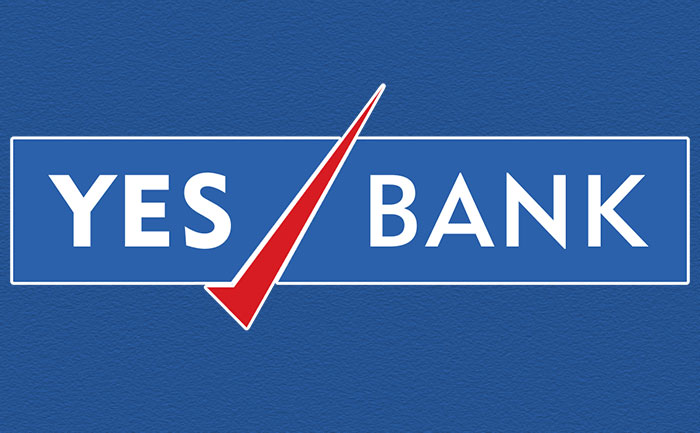

#### **Business Objective**

**The business objective is to develop a predictive model that can forecast the future closing price of YES Bank stock. This will help investors and financial analysts make better investment decisions, optimize portfolio management, and minimize risks associated with stock price volatility.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

# Import Libraries
import numpy as np                                                           #numerical computations
import pandas as pd                                                          #to load the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns                                                        # for visualization
from sklearn.preprocessing import (MinMaxScaler,StandardScaler)              #scaling the data
from sklearn.model_selection import train_test_split                        # split train and test data
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (r2_score,
mean_squared_error,  mean_absolute_percentage_error,
mean_absolute_error)
from sklearn.linear_model import (Lasso, Ridge,ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Load Dataset
df =pd.read_csv('data_YesBank_StockPrices.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [8]:
# Visualizing the missing values
# No Null values found

### What did you know about your dataset?

- There are 185 examples and 5 features in the dataset. The open, high, low, and close are numerical features. Here Date is interpreted as object datatype. There are no duplicate and null values present in the dataset.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,185.0,105.541405,98.879850,10.00,33.80,62.98,153.00,369.95
High,185.0,116.104324,106.333497,11.24,36.14,72.55,169.19,404.00
Low,185.0,94.947838,91.219415,5.55,28.51,58.00,138.35,345.50
Close,185.0,105.204703,98.583153,9.98,33.45,62.54,153.30,367.90


### Variables Description

**Date** - Date of record

**Open** - Stock's opening Price

**High** - Highest price in the day

**Low** - Lowest price in the day

**Close** - Stock's closing price


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print(f'Unique values in ',i, 'are', df[i].nunique())

Unique values in  Date are 185
Unique values in  Open are 183
Unique values in  High are 184
Unique values in  Low are 183
Unique values in  Close are 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
df_copy = df.copy()
df_copy

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [13]:
#converting datatype of Date from string to Datetime
df_copy['Date'].unique()

array(['Jul-05', 'Aug-05', 'Sep-05', 'Oct-05', 'Nov-05', 'Dec-05',
       'Jan-06', 'Feb-06', 'Mar-06', 'Apr-06', 'May-06', 'Jun-06',
       'Jul-06', 'Aug-06', 'Sep-06', 'Oct-06', 'Nov-06', 'Dec-06',
       'Jan-07', 'Feb-07', 'Mar-07', 'Apr-07', 'May-07', 'Jun-07',
       'Jul-07', 'Aug-07', 'Sep-07', 'Oct-07', 'Nov-07', 'Dec-07',
       'Jan-08', 'Feb-08', 'Mar-08', 'Apr-08', 'May-08', 'Jun-08',
       'Jul-08', 'Aug-08', 'Sep-08', 'Oct-08', 'Nov-08', 'Dec-08',
       'Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09',
       'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09',
       'Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-10',
       'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10',
       'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11',
       'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11',
       'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12',
       'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 'Nov-12', 'Dec-

In [14]:
# Split them into month and year separately create two new features -> month and year
df_copy[['Month','Year']] = df_copy.Date.str.split('-',expand=True)

In [15]:
df_copy['Year'] = '20'+df_copy['Year']

In [16]:
df_copy['Year'] = pd.to_numeric(df_copy['Year'])

In [17]:
df_copy.Month.unique()

array(['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar',
       'Apr', 'May', 'Jun'], dtype=object)

In [18]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%b-%y')

In [19]:
df_copy

,Date,Open,High,Low,Close,Month,Year
0,2005-07-01,13.00,14.00,11.25,12.46,Jul,2005
1,2005-08-01,12.58,14.88,12.55,13.42,Aug,2005
2,2005-09-01,13.48,14.87,12.27,13.30,Sep,2005
3,2005-10-01,13.20,14.47,12.40,12.99,Oct,2005
4,2005-11-01,13.35,13.88,12.88,13.41,Nov,2005
...,...,...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95,Jul,2020
181,2020-08-01,12.00,17.16,11.85,14.37,Aug,2020
182,2020-09-01,14.30,15.34,12.75,13.15,Sep,2020
183,2020-10-01,13.30,14.01,12.11,12.42,Oct,2020


In [20]:
# seperating the data
independent_variables = df_copy.columns.tolist()[1:4]
depenent_variable = ['Close']

print(independent_variables)
print(depenent_variable)

['Open', 'High', 'Low']
['Close']


### What all manipulations have you done and insights you found?

- The Date is given in month-year format and I have splitted them by considering two separate features, month and year considering the month and year separately. I have appended '20' before the entries of each year to ensure data consistency. Then, year is converted to numerical datatype.

The open, close, high, and low are positively skewed.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

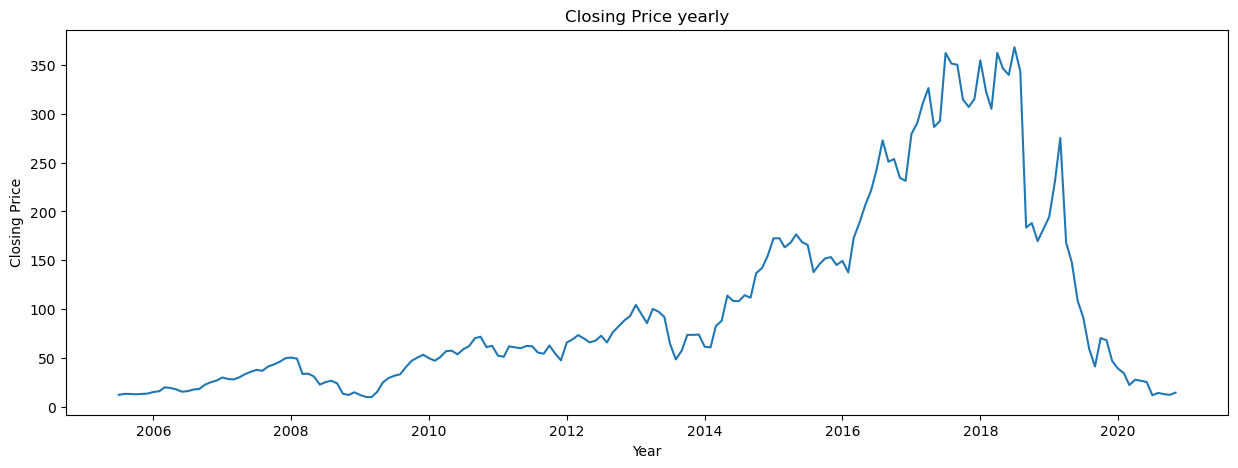

In [21]:
# Chart - 1 visualization code
plt.figure(figsize=(15, 5))
sns.lineplot(x='Date', y='Close', data=df_copy)

plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price yearly')
plt.show()

##### 1. Why did you pick the specific chart?

- To see closing price of each year

##### 2. What is/are the insight(s) found from the chart?

- Form seeing the plot, it is evident that after the fraud case in 2018, the closing price took a huge hit and dropped significantly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, because of the 2018  fraud the yes bank stock has suffered immensily from 2018. That should not happen in the future.

#### Chart - 2

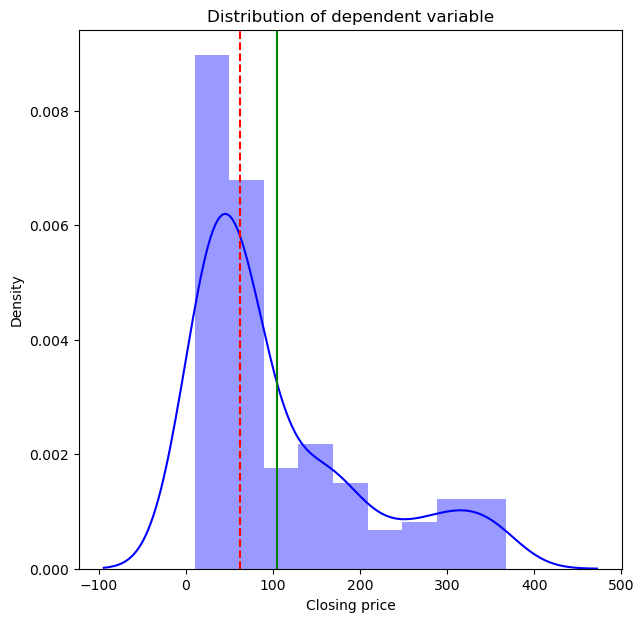

In [22]:
# Dependent variable 'Close', checking the distribution of the dependent variable
plt.figure(figsize=(7,7))
sns.distplot(df_copy['Close'], color='b')
plt.title('Distribution of dependent variable')
plt.xlabel('Closing price')

plt.axvline(df_copy['Close'].mean(), color='green')
plt.axvline(df_copy['Close'].median(), color='red', linestyle='--')

##### 1. Why did you pick the specific chart?

- To check the distribution of the Dependent variable. distplot gives more accurate result.

##### 2. What is/are the insight(s) found from the chart?

- It can be seen that the data is somewhat positively skewed(right skew).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, by observing the chart we now know that the closing price will always change over a period of time and that too because of the fraud in 2018, data is skewed positively. transformation need to be applied which will result in better prediction of closing price.

#### Chart - 3

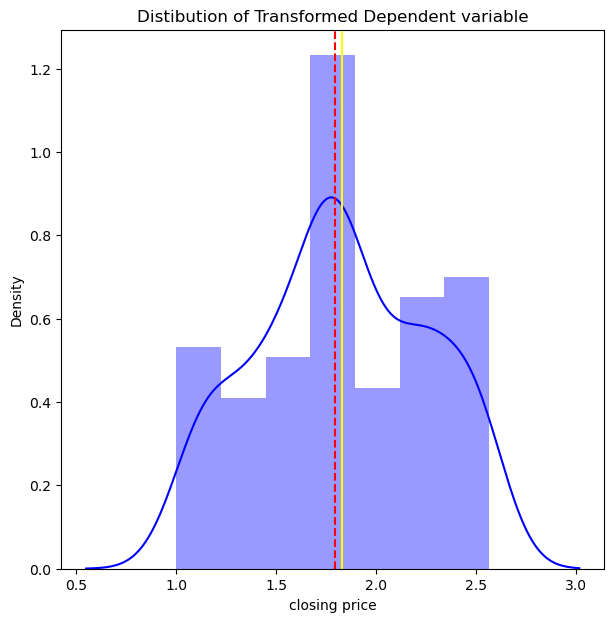

In [23]:
#applying log transformation
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df_copy['Close']),color="b")
plt.title('Distibution of Transformed Dependent variable')
plt.xlabel('closing price')


plt.axvline(np.log10(df_copy['Close']).mean(),color='yellow')
plt.axvline(np.log10(df_copy['Close']).median(),color='red',linestyle='dashed')
plt.show()

##### 1. Why did you pick the specific chart?

- To look at the distribution of y variable

##### 2. What is/are the insight(s) found from the chart?

- After the log transformation it nearly looks like normal distribution.
mean and median are almost same

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- If the data is normally distributed, it becomes easy to develop a good model

#### Chart - 4

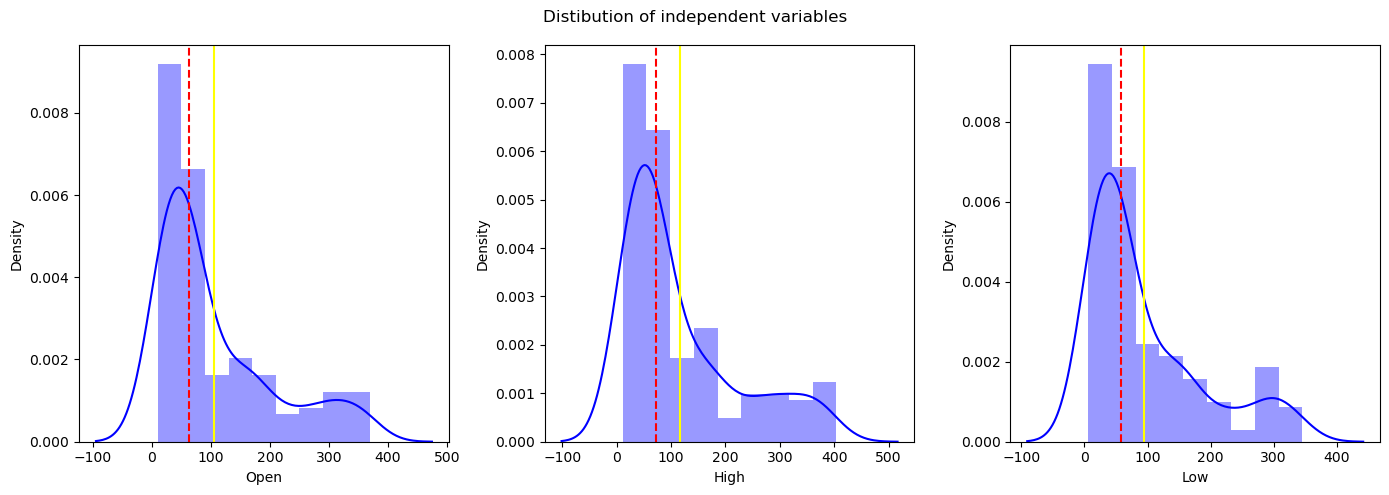

In [24]:
# Plotting the distributions of Independent features.
plt.figure(figsize=(14, 5))

for i, col in enumerate(independent_variables):
    plt.subplot(1, len(independent_variables), i+1)
    sns.distplot(df_copy[col], kde=True, color='b')
    plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(df_copy[col].mean(), color='yellow')
    plt.axvline(df_copy[col].median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of independent variables')
plt.tight_layout()
plt.show()
    

##### 1. Why did you pick the specific chart?

- To see the distributions across all independent variables.

##### 2. What is/are the insight(s) found from the chart?

- It can be seen that all the independent variables are right skewed and transformation is required

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- By observing above chart I came to know that transformation need to be applied on all independent variables which will essentially require for a good model

#### Chart - 5

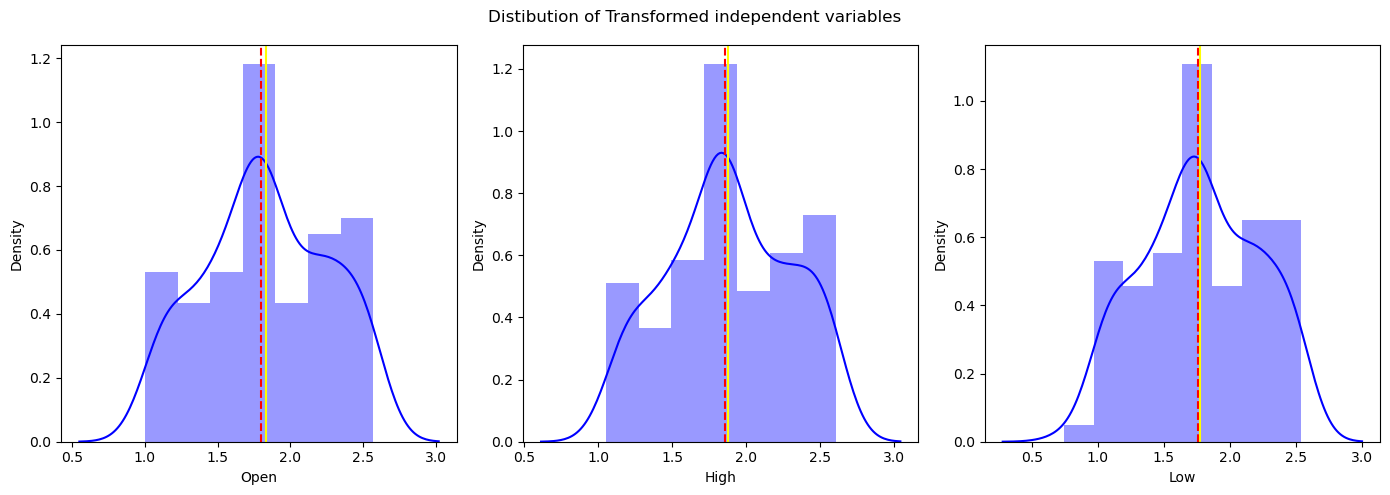

In [25]:

plt.figure(figsize=(14, 5))

for i, col in enumerate(independent_variables):
    plt.subplot(1, len(independent_variables), i+1)
    sns.distplot(np.log10(df_copy[col]), color='b')
    plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(np.log10(df_copy[col]).mean(), color='yellow')
    plt.axvline(np.log10(df_copy[col]).median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of Transformed independent variables')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- To see the distributions across all independent variables after transformation applied.

##### 2. What is/are the insight(s) found from the chart?

- After the log Transformation, the data of all indepedent variables closely follow normal distribution


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- We can build best model if the data is normally distributed.

#### Chart - 6

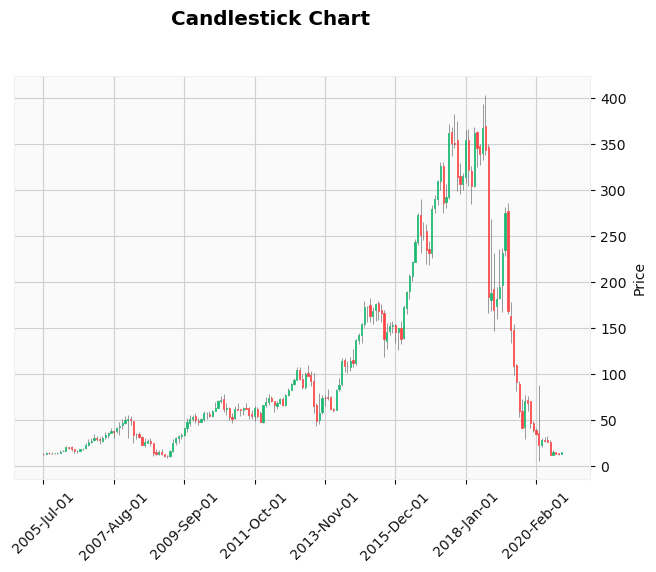

In [26]:
import mplfinance as mpf

# Ensure the DataFrame has a DatetimeIndex
df_candle = df_copy[["Date", "Open", "High", "Low", "Close"]].copy()  # Include the 'Date' column
df_candle['Date'] = pd.to_datetime(df_candle['Date'])  # Convert 'Date' to datetime
df_candle.set_index('Date', inplace=True)  # Set 'Date' as the index

# Plot the candlestick chart
mpf.plot(df_candle, type='candle', style='yahoo', title='Candlestick Chart')

<!-- ##### 1. Why did you pick the specific chart? -->

- Candle sticks are most widely used finance world. with this chart I wnat to see how variables are each month.

##### 2. What is/are the insight(s) found from the chart?

- From the above chart, there is no much deviation from the price shown by open, high, low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- It is important to make sure that there is no huge variation in the data.

#### Chart - 7

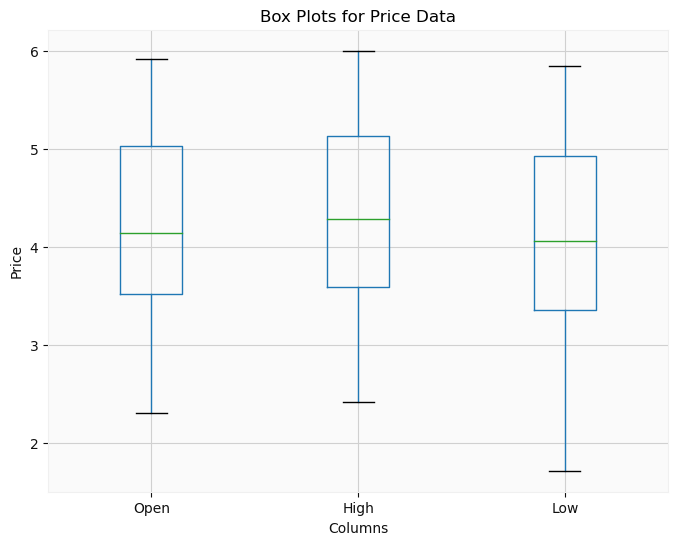

In [27]:
df_price = np.log(df_copy[["Open", "High", "Low"]])

plt.figure(figsize=(8, 6))
df_price.boxplot()
plt.xlabel('Columns')
plt.ylabel('Price')
plt.title('Box Plots for Price Data')
plt.show()

##### 1. Why did you pick the specific chart?

- To check if outliers exists or not in the independent variables

##### 2. What is/are the insight(s) found from the chart?

- After transformation applied, outliers appeared to be diminished.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Outliers are not present in the data, this helps us building a good model, however given the dataset that small, it is also not advisable to completely remove outliers.

#### Chart - 8

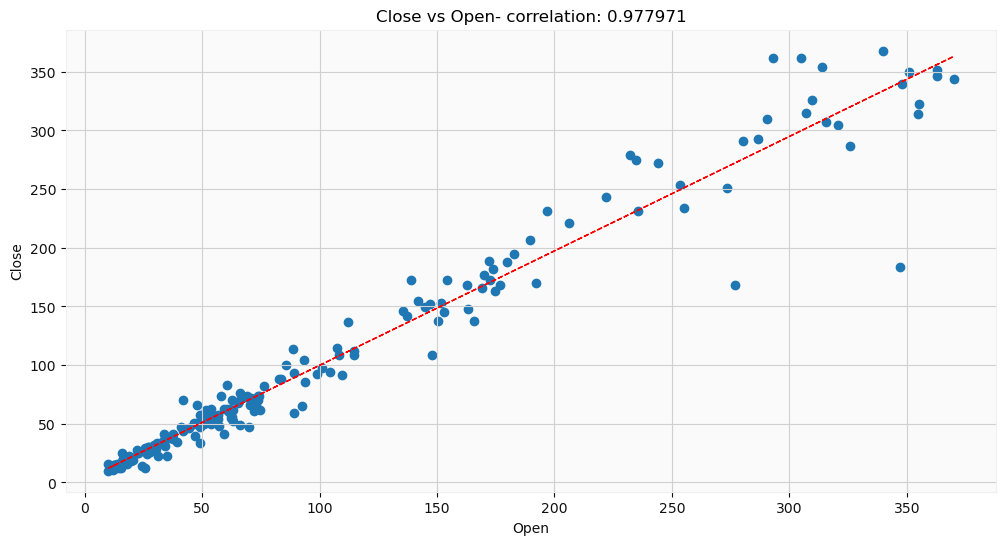

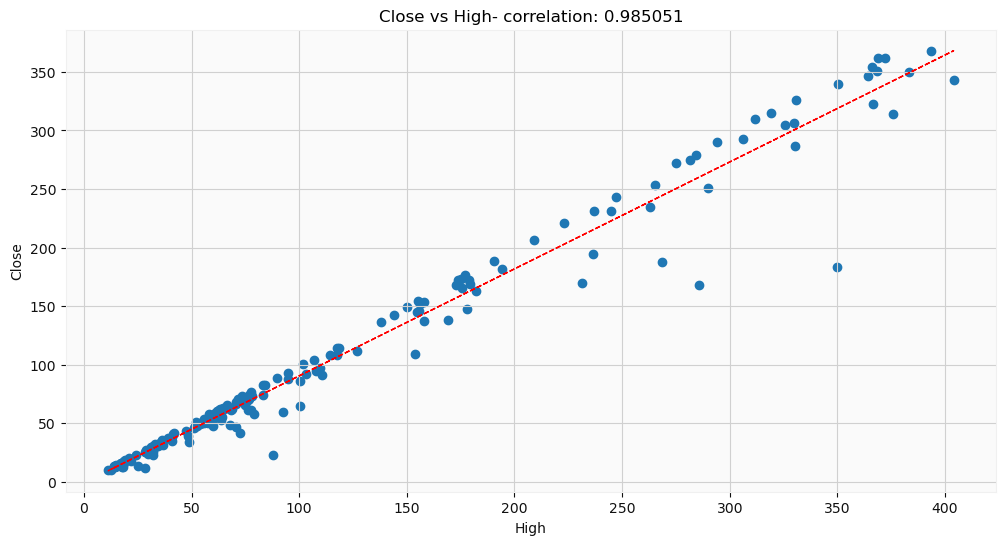

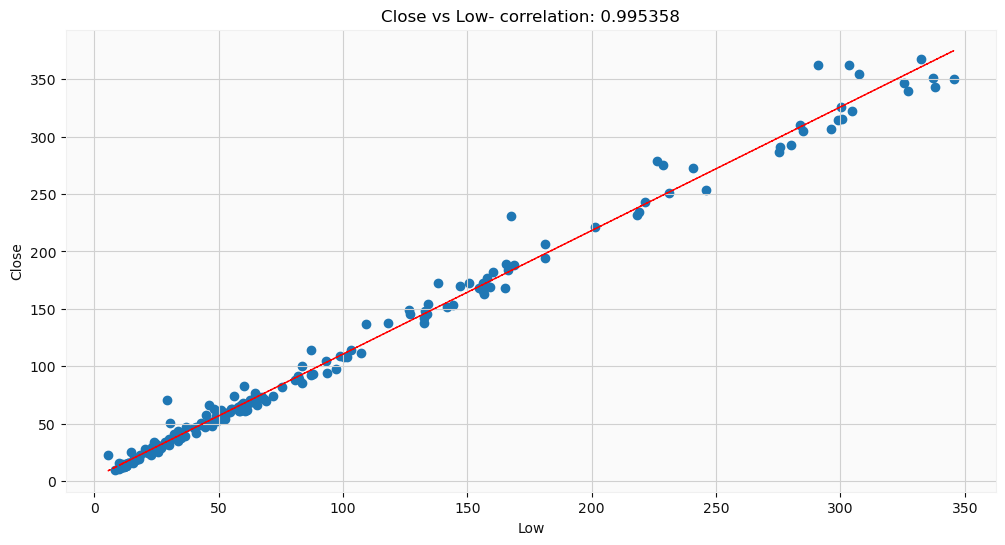

In [28]:
# Plotting the independent variables against dependent variable and checking the correlation between them.
for col in independent_variables:

    fig = plt.figure(figsize=(12, 6))
    ax = fig.gca()
    feature = df_copy[col]
    label = df_copy['Close']
    correlation = feature.corr(label)       # calculating the correlation between dependent variable and independent features.
    plt.scatter(x=feature, y=label)         # plotting dependent variables against independent features.

    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(round((correlation), 6)))

    z = np.polyfit(df_copy[col], df_copy['Close'], 1)
    y_ = np.poly1d(z)(df_copy[col])

    plt.plot(df_copy[col], y_, "r--", lw=1)
plt.show()


##### 1. Why did you pick the specific chart?

- To plot correlation between independent variable and dependent variable.

##### 2. What is/are the insight(s) found from the chart?

- It seems that all independent variables are highly correlated and linear in fashion to dependent variable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- When independent variables are highly correlated to y variable, it means that linear regression is going to be good fit model and also can produce good accuracy.

#### Chart - 9

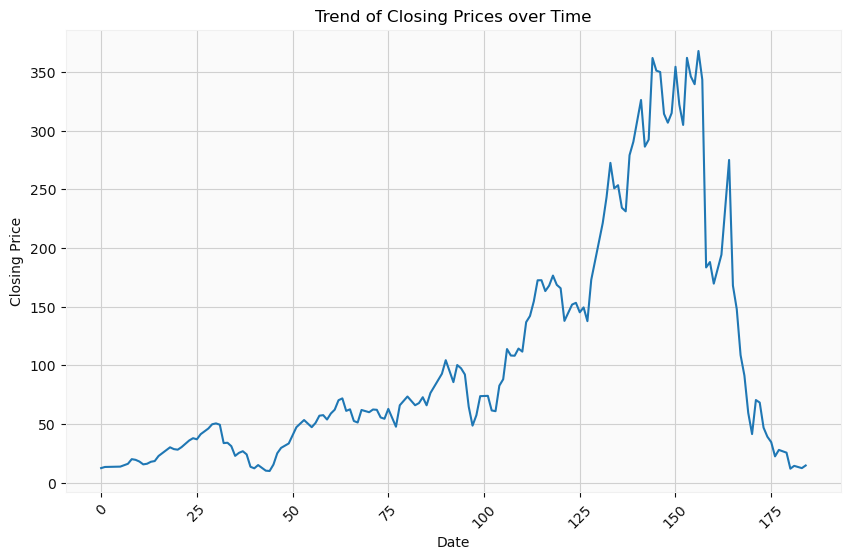

In [29]:
# Extract the date and closing price columns from the dataset
dates = df_copy.index
closing_prices = df_copy['Close']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(dates, closing_prices)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Trend of Closing Prices over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### Chart - 10

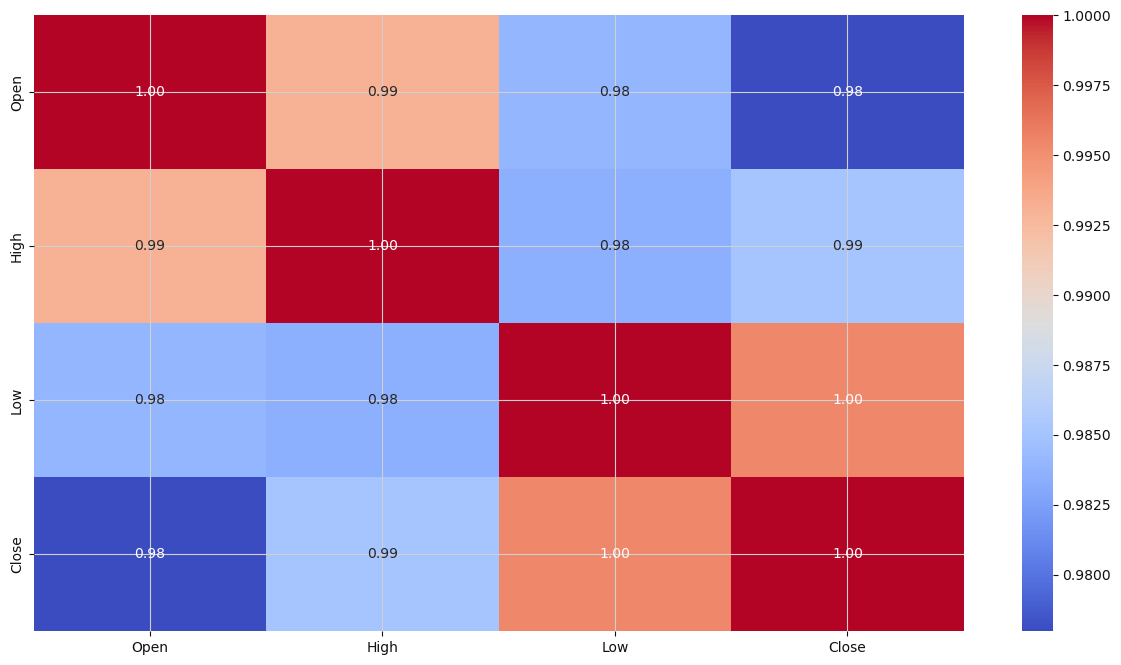

In [30]:
# Correlation Heatmap visualization code

plt.figure(figsize=(15, 8))
correlation = df_copy[['Open', 'High', 'Low', 'Close']].corr()    # Select only price-related columns
sns.heatmap(abs(correlation), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

##### 1. Why did you pick the specific chart?

- To identify the correlation between variables.

##### 2. What is/are the insight(s) found from the chart?

- It is expected that all independent variables are correlated to each other because opening price, high price, low price will not vary much in the finance sector. So, I am going to do feature generation to avoid multicollinearity.

#### Chart - 11

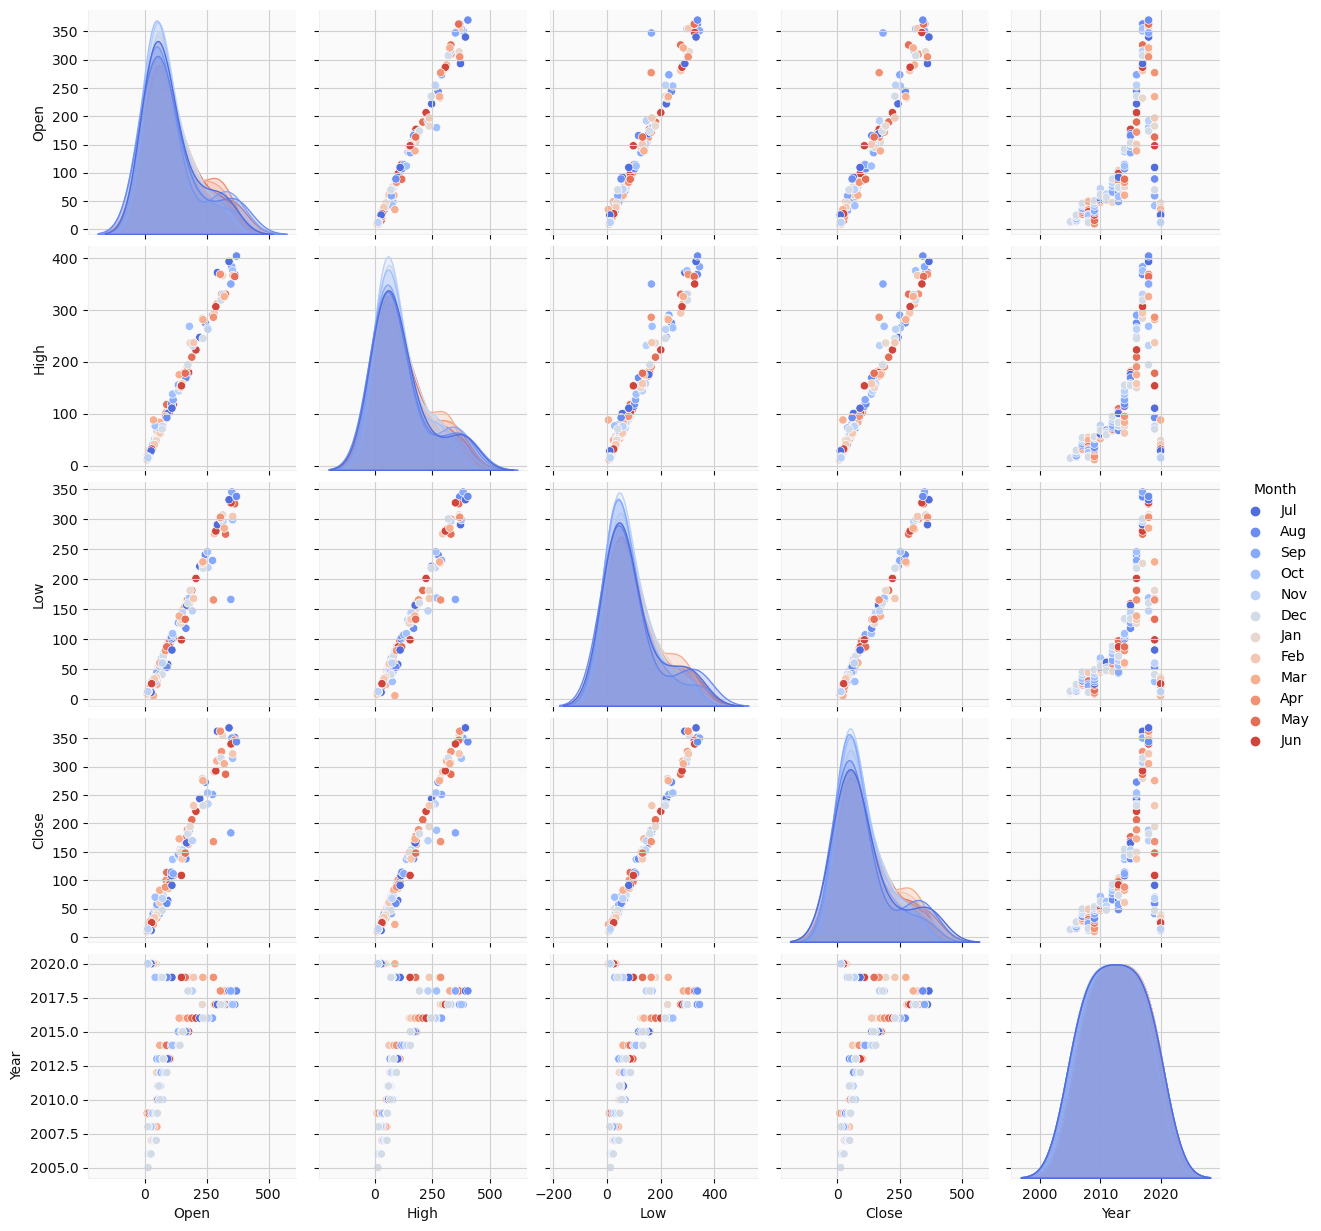

In [31]:
# Pair Plot visualization code

sns.pairplot(df_copy, hue='Month', palette='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

- Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. It gives us in single large picture. This is used essentially to get to know about our data and how our target variable is related with the rest of the variables

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

- Statement1: There is a significant difference in the mean closing prices between the first half (2005-2017) and the second half (2018-2020) of the dataset.

- Statement2: There is a significant difference in the mean closing prices between months with high opening prices and months with low opening prices.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H0): There is no significant difference in the mean closing prices between the first half and the second half of the dataset.

- Alternate Hypothesis (H1): There is a significant difference in the mean closing prices between the first half and the second half of the dataset

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
# Perform Pearson's correlation test
corr_coeff, p_value = stats.pearsonr(df_copy['Open'],df_copy['Close'])
print(f"Pearson correlation coefficient: {corr_coeff:.3f}")
print(f"P-value: {p_value:.5f}")

Pearson correlation coefficient: 0.978
P-value: 0.00000


- As p-value < 0.05, reject Null hypothesis and accept Alternate hypothesis.

##### Which statistical test have you done to obtain P-Value?

- Pearson's correlation test

##### Why did you choose the specific statistical test?

- This test is useful in proving the correlation between two features.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: There is no or negative correlation between Low and High.

**Alternate Hypothesis**: There is a positive correlation between Low and High.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value
# Perform Pearson's correlation test
corr_coeff, p_value = stats.pearsonr(df_copy['Low'], df_copy['High'])
print(f"Pearson correlation coefficient: {corr_coeff:.3f}")
print(f"P-value: {p_value:.5f}")

Pearson correlation coefficient: 0.983
P-value: 0.00000


- As p-value < 0.05, reject Null hypothesis and accept Alternate hypothesis.

##### Which statistical test have you done to obtain P-Value?

- Pearson's correlation test.

##### Why did you choose the specific statistical test?

- This test is useful in proving the correlation between two features

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: There is no or negative correlation between Open and Low.

**Alternate Hypothesis**: There is a positive correlation between Open and Low.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
# Perform Pearson's correlation test

corr_coeff, p_value = stats.pearsonr(df_copy['Open'], df_copy['Low'])
print(f"Pearson correlation coefficient: {corr_coeff:.3f}")
print(f"P-value: {p_value:.5f}")

Pearson correlation coefficient: 0.984
P-value: 0.00000


- As p-value < 0.05, reject Null hypothesis and accept Alternate hypothesis.

##### Which statistical test have you done to obtain P-Value?

- Pearson's correlation test.

##### Why did you choose the specific statistical test?

- This test is useful in proving the correlation between two features.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [35]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

- As there are no null values present, this step is skipped.

### 2. Handling Outliers

In [36]:
# Handling Outliers & Outlier treatments
df_copy.skew(axis=0, numeric_only=True)

Open     1.265717
High     1.229027
Low      1.303268
Close    1.264725
Year    -0.007940
dtype: float64

##### What all outlier treatment techniques have you used and why did you use those techniques?

- The data isn't highly positively skewed, so we would like to retain the outliers.

### 3. Categorical Encoding

In [37]:
# Encode your categorical columns
df_copy.Month.unique()

array(['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar',
       'Apr', 'May', 'Jun'], dtype=object)

In [38]:
month_mapping = {'Jan':1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

df_copy.Month = df_copy.Month.map(month_mapping)

In [39]:
df_copy.Month.unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6], dtype=int64)

In [40]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# CyclicalEncoder for encoding months
class CyclicalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, period=12):
        self.period = period  

    def fit(self, X, y=None):
        return self  

    def transform(self, X):
        X = X.to_numpy().astype(float).reshape(-1, 1)
        X_sin = np.sin(2 * np.pi * X / self.period)
        X_cos = np.cos(2 * np.pi * X / self.period)
        return np.hstack((X_sin, X_cos))
    
# Creating the pipeline
pipeline = Pipeline([
    ('cyclical_encoder', CyclicalEncoder(period=12))
])

# Encoding months in df_copy
encoded_months = pipeline.fit_transform(df_copy[['Month']])
df_copy[['Month_sin', 'Month_cos']] = encoded_months

# Displaying the updated DataFrame
df_copy.head()



,Date,Open,High,Low,Close,Month,Year,Month_sin,Month_cos
0,2005-07-01,13.00,14.00,11.25,12.46,7,2005,-0.500000,-8.660254e-01
1,2005-08-01,12.58,14.88,12.55,13.42,8,2005,-0.866025,-5.000000e-01
2,2005-09-01,13.48,14.87,12.27,13.30,9,2005,-1.000000,-1.836970e-16
3,2005-10-01,13.20,14.47,12.40,12.99,10,2005,-0.866025,5.000000e-01
4,2005-11-01,13.35,13.88,12.88,13.41,11,2005,-0.500000,8.660254e-01


#### What all categorical encoding techniques have you used & why did you use those techniques?

- I have used Cyclical Encoding to encode the months. This is because months follow a cyclic pattern, after December, January comes. Ordinal or OneHot Encoding won't be effective in capturing this cyclic nature.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [41]:
# Manipulate Features to minimize feature correlation and create new features
# This step is already done before

#### 2. Feature Selection

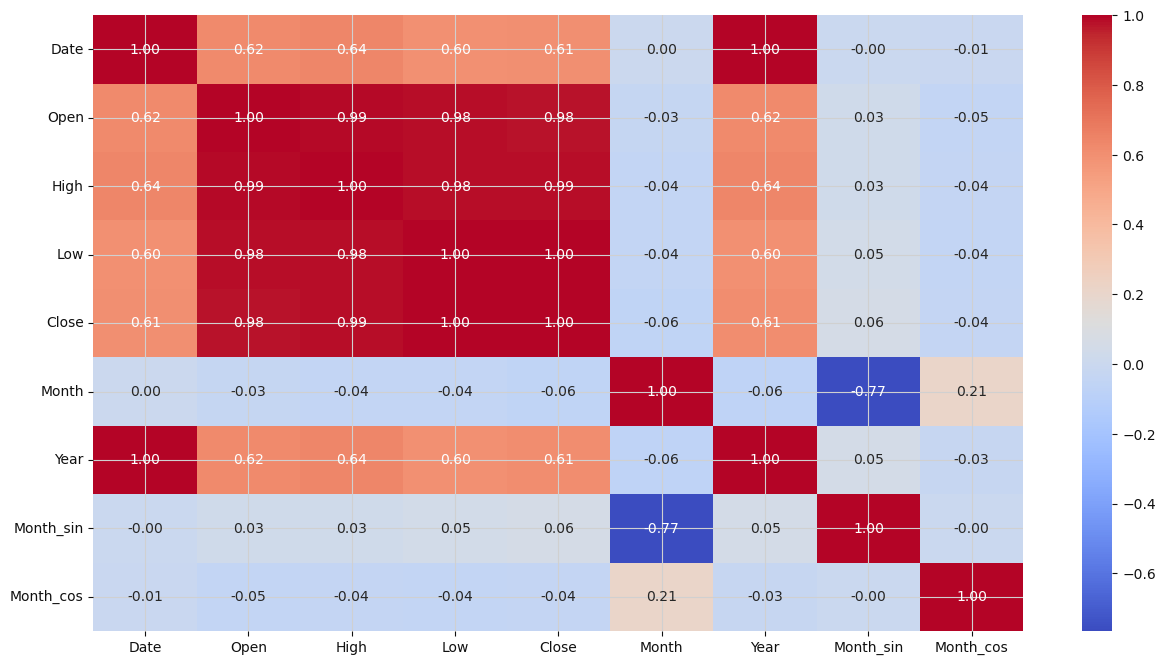

In [42]:
# Select your features wisely to avoid overfitting
# Now all the features are numerical, we can plot the correlation matrix
plt.figure(figsize=(15, 8))
correlation = df_copy.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

##### What all feature selection methods have you used  and why?

- After encoding the month, I used correlation matrix as all the updated features are numerical.

##### Which all features you found important and why?

- Close, open, high, and low are highly correlated with each other. I think Open is sufficient for considering but I decided to consider two cases for model training. Case 1: Including 'High' and 'Low', Case 2: Excluding 'High' and 'Low'. I would like to evaluate the model performance and see.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [43]:
# Transform Your data
# Not needed

### 6. Data Scaling

In [44]:
# Scaling your data
# Except month_sin and month_cos, rest of the numerical features are scaled.
from sklearn.preprocessing import RobustScaler

# Create a copy to preserve the original data
df_scaled = df_copy.copy()

# Apply RobustScaler only to specific columns
scaler = RobustScaler()
df_scaled[['Open', 'High', 'Low']] = scaler.fit_transform(df_scaled[['Open', 'High', 'Low']])

# Display result
df_scaled.head()



,Date,Open,High,Low,Close,Month,Year,Month_sin,Month_cos
0,2005-07-01,-0.419295,-0.440060,-0.425619,12.46,7,2005,-0.500000,-8.660254e-01
1,2005-08-01,-0.422819,-0.433446,-0.413784,13.42,8,2005,-0.866025,-5.000000e-01
2,2005-09-01,-0.415268,-0.433521,-0.416333,13.30,9,2005,-1.000000,-1.836970e-16
3,2005-10-01,-0.417617,-0.436528,-0.415149,12.99,10,2005,-0.866025,5.000000e-01
4,2005-11-01,-0.416359,-0.440962,-0.410779,13.41,11,2005,-0.500000,8.660254e-01


In [45]:
std_num = StandardScaler()
df_scaled['Year'] = std_num.fit_transform(df_scaled[['Year']])

In [46]:
df_scaled

,Date,Open,High,Low,Close,Month,Year,Month_sin,Month_cos
0,2005-07-01,-0.419295,-0.440060,-0.425619,12.46,7,-1.727368,-0.500000,-8.660254e-01
1,2005-08-01,-0.422819,-0.433446,-0.413784,13.42,8,-1.727368,-0.866025,-5.000000e-01
2,2005-09-01,-0.415268,-0.433521,-0.416333,13.30,9,-1.727368,-1.000000,-1.836970e-16
3,2005-10-01,-0.417617,-0.436528,-0.415149,12.99,10,-1.727368,-0.866025,5.000000e-01
4,2005-11-01,-0.416359,-0.440962,-0.410779,13.41,11,-1.727368,-0.500000,8.660254e-01
...,...,...,...,...,...,...,...,...,...
180,2020-07-01,-0.313591,-0.332582,-0.426985,11.95,7,1.636454,-0.500000,-8.660254e-01
181,2020-08-01,-0.427685,-0.416310,-0.420157,14.37,8,1.636454,-0.866025,-5.000000e-01
182,2020-09-01,-0.408389,-0.429989,-0.411963,13.15,9,1.636454,-1.000000,-1.836970e-16
183,2020-10-01,-0.416779,-0.439985,-0.417790,12.42,10,1.636454,-0.866025,5.000000e-01


##### Which method have you used to scale you data and why?


- For Open, High, and Low, I have used RobustScaler as the data is positively skewed whereas StandardScaler is used on year. On the other hand month_sin and month_cos are already scaled, so no encoding has been done on them.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

- Not needed, the number of feature is low and we have the relevant features for training

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

- N/A

### 8. Data Splitting

In [47]:
# Split your data to train and test. Choose Splitting ratio wisely.

X1 = df_scaled.drop(['High', 'Low', 'Date'], axis=1, errors='ignore')  # errors='ignore' ensures no error if 'Date' isn't present
X2 = df_scaled.drop(['Date'], axis=1, errors='ignore')

# Target Variable
Y1 = df_copy['Close']
Y2 = df_copy['Close']

# Data Splitting
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=42)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)



##### What data splitting ratio have you used and why?

- 80% of training set and 20% of test set, because this is standard and reasonable splitting ratio.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [48]:
df_copy.Month.value_counts()

Month
7     16
8     16
9     16
10    16
11    16
12    15
1     15
2     15
3     15
4     15
5     15
6     15
Name: count, dtype: int64

- Not much of an imbalance is seen. The data is available from July 2005, so there are enough number of categories for each class.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

N/A

## ***7. ML Model Implementation***

### ML Model - 1

In [49]:
# ML Model - LinearRegression
# Case 1:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train1, Y_train1)

LinearRegression()

In [50]:
# Predict the model
y_pred1 = lr1.predict(X_test1)

# Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(Y_test1, y_pred1))  # Correct RMSE calculation
r2 = r2_score(Y_test1, y_pred1)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Root Mean Squared Error (RMSE): 1.4180816941782306e-14
R² Score: 1.0


In [51]:
# Case 2:
lr2 = LinearRegression()
# Train the model
lr2.fit(X_train2, Y_train2)

LinearRegression()

In [52]:
Y_tr_pred2 = lr2.predict(X_test2)
rmse = np.sqrt(mean_squared_error(Y_test2, Y_tr_pred2))
r2 = r2_score(Y_test2, Y_tr_pred2)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Root Mean Squared Error (RMSE): 2.6217837740602846e-14
R² Score: 1.0


- Including 'High' and 'Low' has a significant impact on model performance as the Root mean squared error is lesser and R2 score is higher than that of excluding 'High' and 'Low'. No need for cross validation or hyperparameter tuning as the model has performed well on the test dataset. The RMSE is very less and R2 score is close to 1.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [53]:
# Visualizing evaluation Metric Score chart
lasso = Lasso()

# Train the model 
lasso.fit(X_train2, Y_train2)

Lasso()

In [54]:
y_tr_pred3 = lasso.predict(X_train2)
rmse = np.sqrt(mean_squared_error(Y_train2, y_tr_pred3))
r2 = r2_score(Y_train2, y_tr_pred3)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Root Mean Squared Error (RMSE): 0.010097400807699691
R² Score: 0.9999999896046675


In [55]:
# Predict the model
Y_pred3 = lasso.predict(X_test2)
rmse = np.sqrt(mean_squared_error(Y_test2, Y_pred3))
r2 = r2_score(Y_test2,Y_pred3)
print("Root mean squared error:",rmse)
print("R2 score:",r2)

Root mean squared error: 0.009733288003197064
R2 score: 0.9999999895189022


#### 2. Cross- Validation & Hyperparameter Tuning

In [56]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
params = {'alpha':[0.01, 0.1, 1, 10, 100]}  # Tuning alpha

lasso_cv = GridSearchCV(lasso, params, cv=5, scoring = 'neg_mean_squared_error')

# Fit the Algorithm
lasso_cv.fit(X_train2, Y_train2)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [57]:
best_param = lasso_cv.best_params_['alpha']
best_param

0.1

In [58]:
lasso_best = lasso_cv.best_estimator_
# Predict on Train
y_tr_pred4 = lasso_best.predict(X_train2)
rmse = np.sqrt(mean_squared_error(Y_train2,y_tr_pred4))
r2 = r2_score(Y_train2, y_tr_pred4)
print("Root mean squared error:",rmse)
print("R2 score:",r2)

Root mean squared error: 0.0010097400807810618
R2 score: 0.9999999998960467


In [59]:
#Predict the model
Y_pred4 = lasso_best.predict(X_test2)
rmse = np.sqrt(mean_squared_error(Y_test2, Y_pred4))
r2 = r2_score(Y_test2, Y_pred4)

print("Root mean squared error:",rmse)
print("R2 score:",r2)

Root mean squared error: 0.000973328800335104
R2 score: 0.9999999998951891


##### Which hyperparameter optimization technique have you used and why?

- GridSearchCV, as it considers all the possible paramter combinations.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Yes. The RMSE was lower and R2 score was quite higher after hyperparameter tuning.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [60]:
# ML Model - 3 Implementation
ridge = Ridge()
# Fit the Algorithm
ridge.fit(X_train2, Y_train2)

Ridge()

In [61]:
y_tr_pred5 = ridge.predict(X_train2)
rmse = np.sqrt(mean_squared_error(Y_train2, y_tr_pred5))
r2 = r2_score(Y_train2, y_tr_pred5)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Root Mean Squared Error (RMSE): 0.0004282726243040763
R² Score: 0.9999999999812992


In [62]:
# Predict the model
Y_pred5 = ridge.predict(X_test2)
rmse = np.sqrt(mean_squared_error(Y_test2,Y_pred5))
r2 = r2_score(Y_test2,Y_pred5)
print("Root mean squared error:",rmse)
print("R2 score:",r2)

Root mean squared error: 0.0005668160595152579
R2 score: 0.9999999999644555


#### 2. Cross- Validation & Hyperparameter Tuning

In [63]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(ridge, params, cv=5, scoring='neg_mean_squared_error')
# Fit the Algorithm
ridge_cv.fit(X_train2, Y_train2)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [64]:
best_par = ridge_cv.best_params_['alpha']
best_par

0.01

In [65]:
ridge_best = ridge_cv.best_estimator_
# Predict on Train
y_tr_pred6 = ridge_best.predict(X_train2)
rmse = np.sqrt(mean_squared_error(Y_train2,y_tr_pred6))
r2 = r2_score(Y_train2,y_tr_pred6)
print("Root mean squared error:",rmse)
print("R2 score:",r2)

Root mean squared error: 1.0706593598981001e-05
R2 score: 0.9999999999999883


In [66]:
# Predict the model
Y_pred6 = ridge_best.predict(X_test2)
rmse = np.sqrt(mean_squared_error(Y_test2,Y_pred6))
r2 = r2_score(Y_test2,Y_pred6)
print("Root mean squared error:",rmse)
print("R2 score:",r2)

Root mean squared error: 1.634322266325727e-05
R2 score: 0.9999999999999705


##### Which hyperparameter optimization technique have you used and why?

- GridSearchCV, as it considers all the possible paramter combinations.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Yes. The RMSE was lower and R2 score was quite higher after hyperparameter tuning.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

- I have considered two metrics which is the root_mean_squared_error and r2_score because these two are the best metrics to evaluate the model performance. mean_absolute_error is not efficient due to the modulus function having a discontinity at 0. Lesser the root_mean_squared_error and closer the r2_score to 1, higher the accuracy of the predictions given by the model thereby ensuring a positive business impact.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

- Linear regression performed well and hyperparameter tuning wasn't required to improve the model performance unlike Lasso or Ridge. Also the RMSE and R2 score of Linear regression are quite close to the RMSE and R2 scores of Lasso and Ridge after hyperparameter tuning.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

- I have performed feature importance manually by considering two cases, excluding High and Low, and Including High and Low. I observed that the model performed better when including High and Low.

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
import pickle

# Save the model
with open("Linear_Regression_model.pkl", "wb") as file:
    pickle.dump(lr1, file)

print("Model saved successfully as Linear_Regression_model.pkl")


Model saved successfully as Linear_Regression_model.pkl


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

with open("Linear_Regression_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Predict using the loaded model
Y_pred_loaded = loaded_model.predict(X_test1)

# Example RMSE calculation
rmse_loaded = np.sqrt(mean_squared_error(Y_test1, Y_pred_loaded))

print(f"Loaded Model RMSE: {rmse_loaded:.4f}")

# **Conclusion**

- Linear Regression model can be used to predict the stock's closing price based on the opening price, highest, and lowest price of the day along with the year and month. This is because the most of the features are positively correlated and from the scatterplot, a linear relationship is observed.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***